<a href="https://colab.research.google.com/github/coding-cosmos/Sluice-Gate-Cavitation-Index/blob/main/notebooks/Sluice_gate_Uncertainty_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo



## Utils

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Monte Carlo simulation function
def monte_carlo_simulation(data, observed_col, predicted_col, num_simulations=1000):
    """
    Perform Monte Carlo simulation to calculate uncertainty bounds.

    Parameters:
    - data: DataFrame containing observed and predicted values.
    - observed_col: Column name for observed values.
    - predicted_col: Column name for predicted values.
    - num_simulations: Number of Monte Carlo simulations to run.

    Returns:
    - results: DataFrame with observed values, mean predictions, lower and upper bounds of 95%PPU.
    """
    observed = data[observed_col]
    predicted = data[predicted_col]

    # Generate random noise based on the standard deviation of residuals
    residuals = observed - predicted
    noise = np.random.normal(loc=0, scale=np.std(residuals), size=(num_simulations, len(predicted)))

    # Perform Monte Carlo simulations
    simulated_predictions = predicted.values + noise

    # Calculate statistics
    lower_bound = np.percentile(simulated_predictions, 2.5, axis=0)
    upper_bound = np.percentile(simulated_predictions, 97.5, axis=0)
    mean_prediction = np.mean(simulated_predictions, axis=0)

    # Combine results into a DataFrame
    results = pd.DataFrame({
        'Observed': observed,
        'Mean_Prediction': mean_prediction,
        'Lower_95PPU': lower_bound,
        'Upper_95PPU': upper_bound
    })

    return results

# Calculate P-factor, R-factor, d-bar, and 95% PPU average width
def calculate_uncertainty_metrics(results):
    """
    Calculate P-factor, R-factor, d-bar (average width), and 95% PPU for uncertainty analysis.

    Parameters:
    - results: DataFrame containing observed values, mean predictions, and 95%PPU bounds.

    Returns:
    - metrics: Dictionary containing P-factor, R-factor, d-bar, and 95% PPU.
    """
    observed = results['Observed']
    lower_bound = results['Lower_95PPU']
    upper_bound = results['Upper_95PPU']

    # P-factor: Percentage of observed values within 95%PPU
    within_bounds = (observed >= lower_bound) & (observed <= upper_bound)
    p_factor = within_bounds.mean()

    # R-factor: Average thickness of 95%PPU divided by the standard deviation of observed data
    r_factor = np.mean(upper_bound - lower_bound) / np.std(observed)

    # d-bar: Average width of 95%PPU
    d_bar = np.mean(upper_bound - lower_bound)

    metrics = {
        'P-factor': p_factor,
        'R-factor': r_factor,
        'd-bar': d_bar,
        '95% PPU': d_bar  # Using d-bar as the width of the uncertainty band
    }

    return metrics


# Rank models based on R-factor and 95% PPU
def rank_models(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict).T  # Transpose for easier handling
    metrics_df = metrics_df.sort_values(by=['R-factor', '95% PPU'])
    metrics_df['Rank'] = range(1, len(metrics_df) + 1)
    return metrics_df


def run_mc(data,models):

  # Perform Monte Carlo simulations and calculate metrics for all models
  results_dict = {}
  metrics_dict = {}

  for model in models:
      print(f"Processing model: {model}")
      # Perform Monte Carlo simulation
      results = monte_carlo_simulation(data, observed_col='sigma', predicted_col=model)
      results_dict[model] = results

      # Calculate uncertainty metrics
      metrics = calculate_uncertainty_metrics(results)
      metrics_dict[model] = metrics

      # Visualization
      plt.fill_between(range(len(results['Observed'])), results['Lower_95PPU'], results['Upper_95PPU'], color='navy', alpha=0.5, label='95PPU')
      plt.plot(range(len(results['Observed'])), results['Observed'], 'r-', label='Observed $cd$')
      plt.plot(range(len(results['Observed'])), results['Mean_Prediction'], 'b--', label='Mean Prediction')
      plt.title(f'{model}', fontsize=14, fontweight='bold')
      plt.xlabel('Number of datasets', fontsize=12)
      plt.ylabel(r'$cd$', fontsize=12)
      plt.xticks(fontsize=10)
      plt.yticks(fontsize=10)
      plt.legend(loc='upper right', fontsize=10)
      plt.tight_layout()
      plt.show()

  # Get ranked models
  ranked_models = rank_models(metrics_dict)

  # Output metrics for all models
  for model, metrics in metrics_dict.items():
      print(f"\nUncertainty Metrics for {model} Model:")
      print(metrics)

  # Display ranked models
  print("\nRanked Models Based on R-factor and 95% PPU:")
  print(ranked_models)

## Dimensional

### Training Data

Processing model: gbm


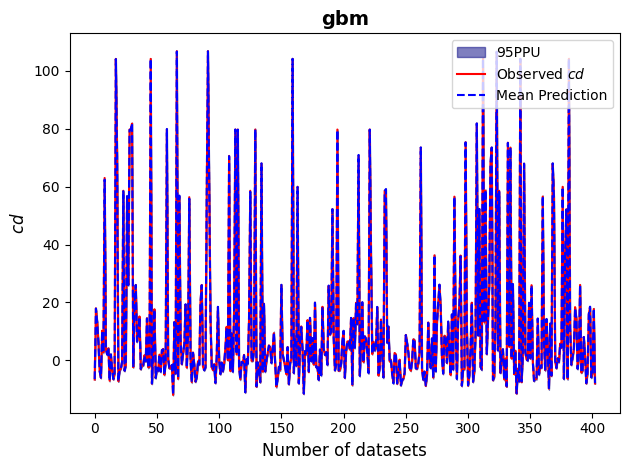

Processing model: xgb


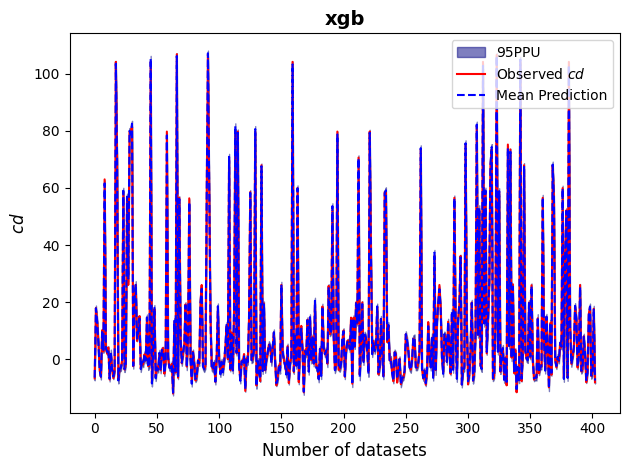

Processing model: RF


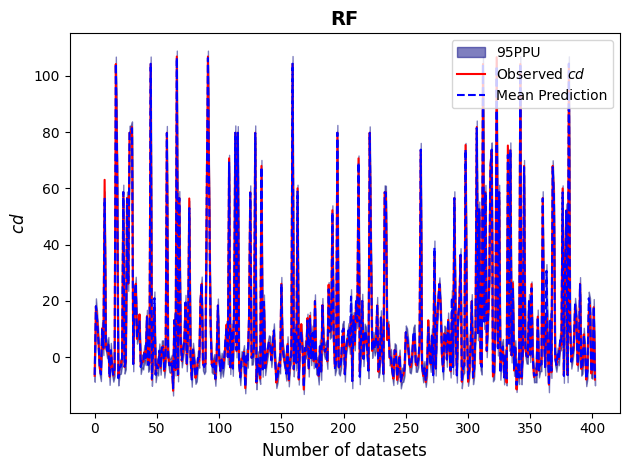

Processing model: Cat


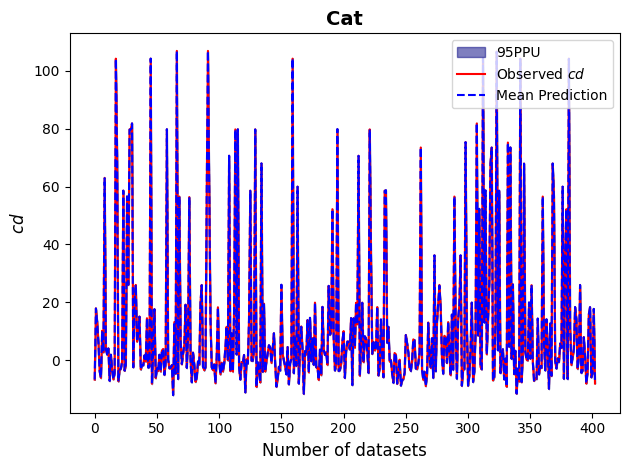

Processing model: XRT


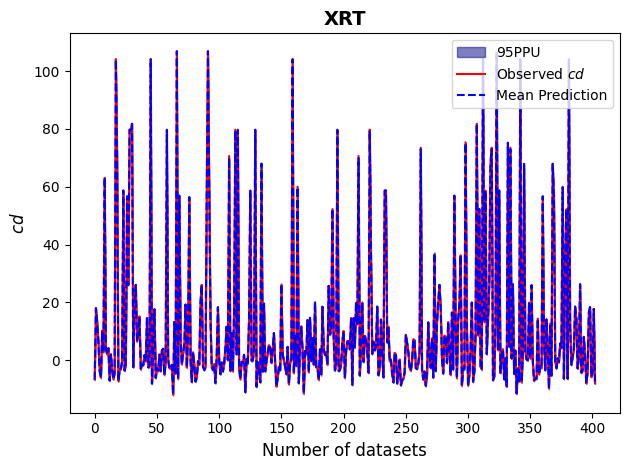


Uncertainty Metrics for gbm Model:
{'P-factor': np.float64(0.9478908188585607), 'R-factor': np.float64(0.01857360377542756), 'd-bar': np.float64(0.47925460363887623), '95% PPU': np.float64(0.47925460363887623)}

Uncertainty Metrics for xgb Model:
{'P-factor': np.float64(0.9354838709677419), 'R-factor': np.float64(0.07696177636832133), 'd-bar': np.float64(1.9858443237354244), '95% PPU': np.float64(1.9858443237354244)}

Uncertainty Metrics for RF Model:
{'P-factor': np.float64(0.9602977667493796), 'R-factor': np.float64(0.19629513856123354), 'd-bar': np.float64(5.065002460742796), '95% PPU': np.float64(5.065002460742796)}

Uncertainty Metrics for Cat Model:
{'P-factor': np.float64(0.9429280397022333), 'R-factor': np.float64(0.010387087400481816), 'd-bar': np.float64(0.2680179633026378), '95% PPU': np.float64(0.2680179633026378)}

Uncertainty Metrics for XRT Model:
{'P-factor': np.float64(0.9478908188585607), 'R-factor': np.float64(0.019148604738600406), 'd-bar': np.float64(0.49409135056

In [ ]:
 # Models to analyze
models = ['gbm', 'xgb','RF','Cat','XRT']
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_training.csv')
run_mc(data,models)

### Testing Data

Processing model: gbm


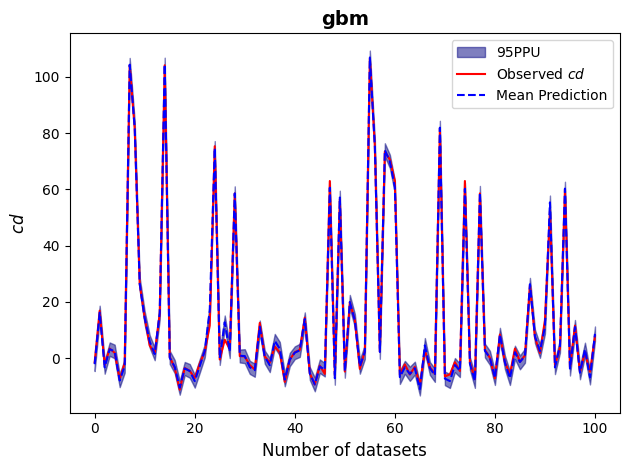

Processing model: xgb


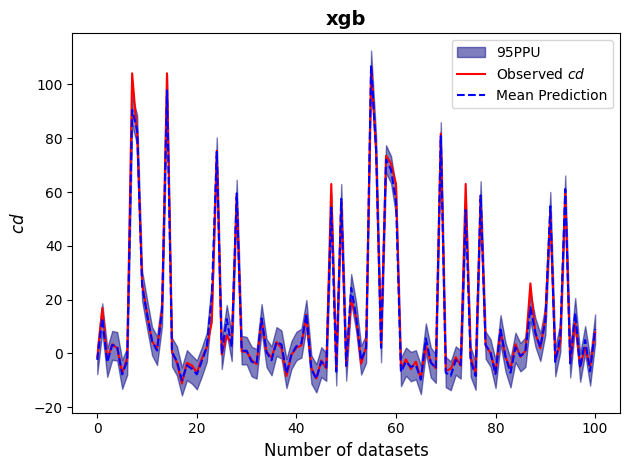

Processing model: RF


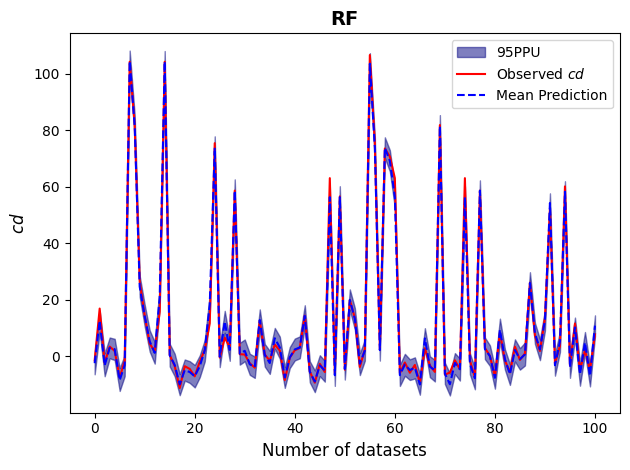

Processing model: Cat


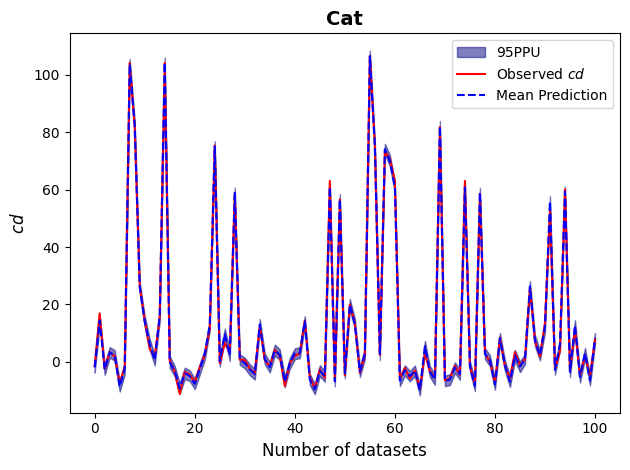

Processing model: XRT


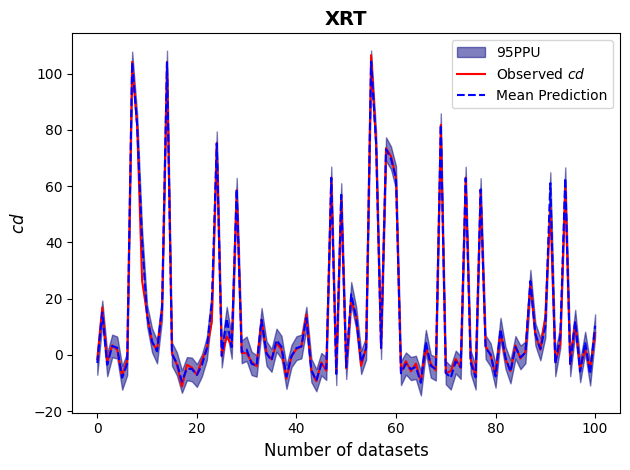


Uncertainty Metrics for gbm Model:
{'P-factor': np.float64(0.9504950495049505), 'R-factor': np.float64(0.16618195036169592), 'd-bar': np.float64(4.788832878728656), '95% PPU': np.float64(4.788832878728656)}

Uncertainty Metrics for xgb Model:
{'P-factor': np.float64(0.9207920792079208), 'R-factor': np.float64(0.36968690962692596), 'd-bar': np.float64(10.653195631678381), '95% PPU': np.float64(10.653195631678381)}

Uncertainty Metrics for RF Model:
{'P-factor': np.float64(0.9207920792079208), 'R-factor': np.float64(0.26263948191761627), 'd-bar': np.float64(7.568430768334773), '95% PPU': np.float64(7.568430768334773)}

Uncertainty Metrics for Cat Model:
{'P-factor': np.float64(0.9108910891089109), 'R-factor': np.float64(0.12984827619346706), 'd-bar': np.float64(3.7418124707774596), '95% PPU': np.float64(3.7418124707774596)}

Uncertainty Metrics for XRT Model:
{'P-factor': np.float64(0.9603960396039604), 'R-factor': np.float64(0.2830294680839421), 'd-bar': np.float64(8.15600502617445), '

In [ ]:
 # Models to analyze
models = ['gbm', 'xgb','RF','Cat','XRT']
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_testing.csv')
run_mc(data,models)

## Non dimensional

### Training data

Processing model: gbm


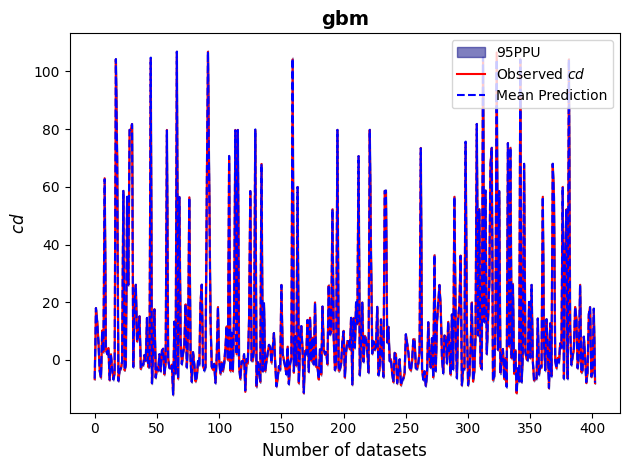

Processing model: xgb


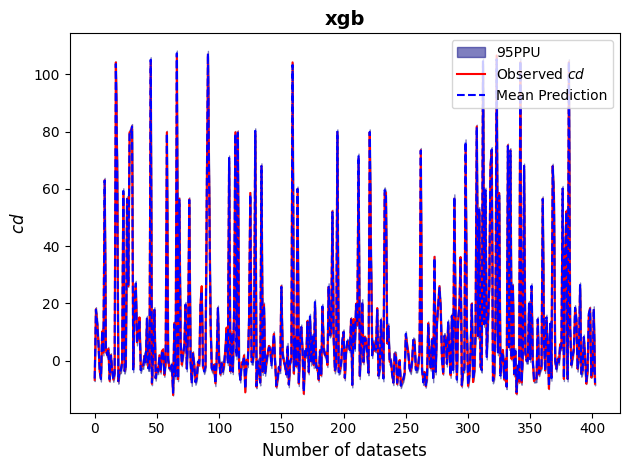

Processing model: RF


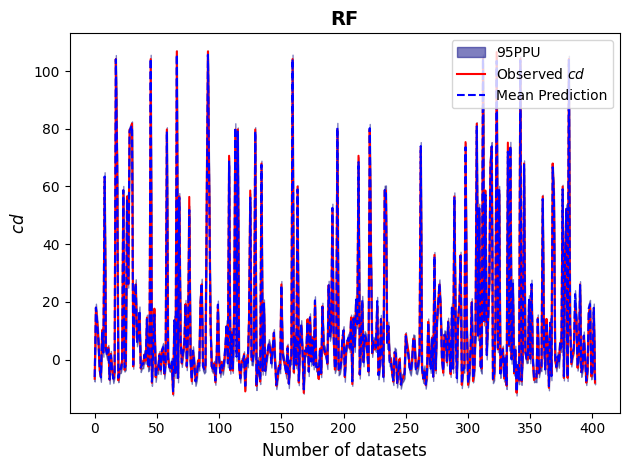

Processing model: Cat


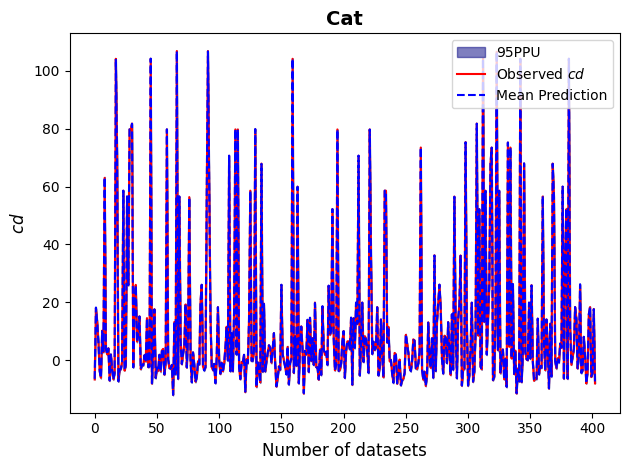

Processing model: XRT


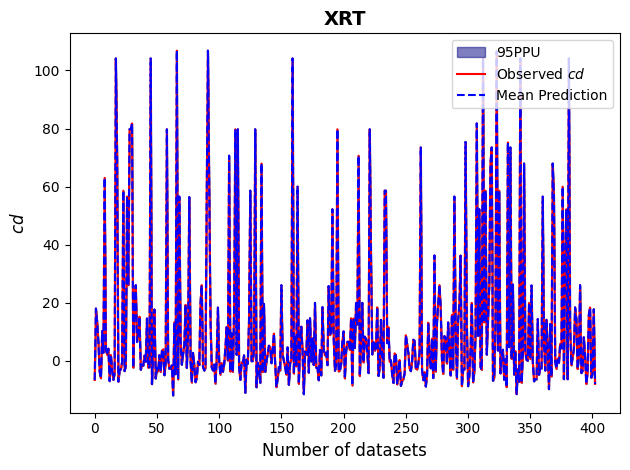


Uncertainty Metrics for gbm Model:
{'P-factor': np.float64(0.9826302729528535), 'R-factor': np.float64(0.025566553236572698), 'd-bar': np.float64(0.659693642976069), '95% PPU': np.float64(0.659693642976069)}

Uncertainty Metrics for xgb Model:
{'P-factor': np.float64(0.9429280397022333), 'R-factor': np.float64(0.06834775223191021), 'd-bar': np.float64(1.7635767028070035), '95% PPU': np.float64(1.7635767028070035)}

Uncertainty Metrics for RF Model:
{'P-factor': np.float64(0.9503722084367245), 'R-factor': np.float64(0.11313329937426038), 'd-bar': np.float64(2.9191779476689823), '95% PPU': np.float64(2.9191779476689823)}

Uncertainty Metrics for Cat Model:
{'P-factor': np.float64(0.9478908188585607), 'R-factor': np.float64(0.014682620031441995), 'd-bar': np.float64(0.3788555699060601), '95% PPU': np.float64(0.3788555699060601)}

Uncertainty Metrics for XRT Model:
{'P-factor': np.float64(0.9379652605459057), 'R-factor': np.float64(0.0011461967986429655), 'd-bar': np.float64(0.02957531015

In [ ]:
 # Models to analyze
models = ['gbm', 'xgb','RF','Cat','XRT']
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ndim_training.csv')
run_mc(data,models)

### Testing Data

Processing model: gbm


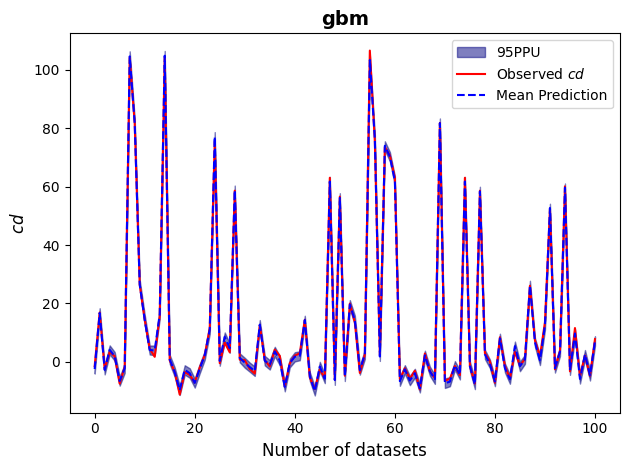

Processing model: xgb


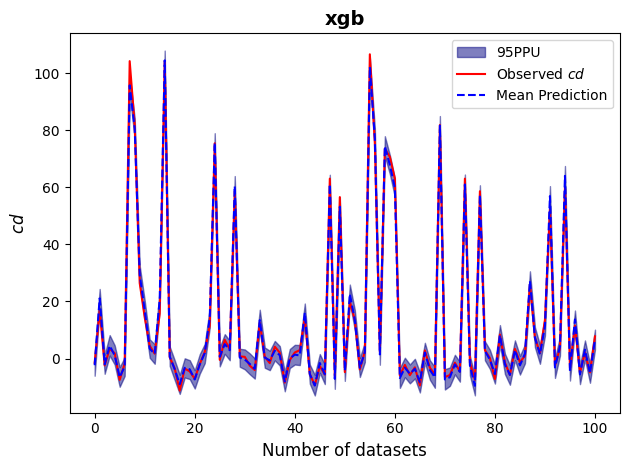

Processing model: RF


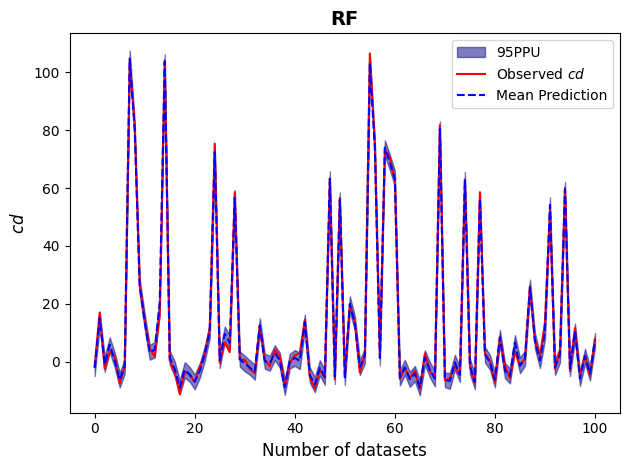

Processing model: Cat


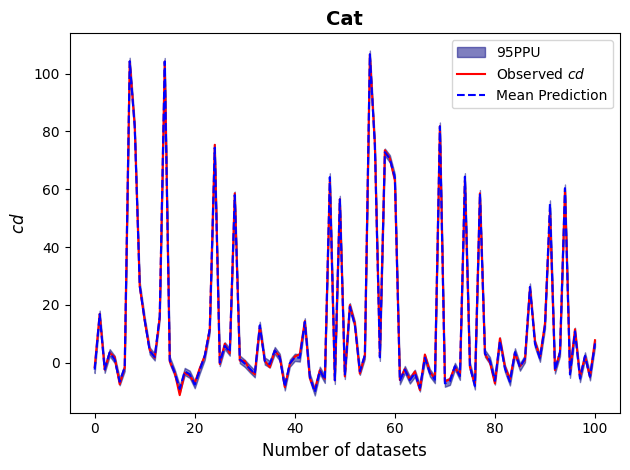

Processing model: XRT


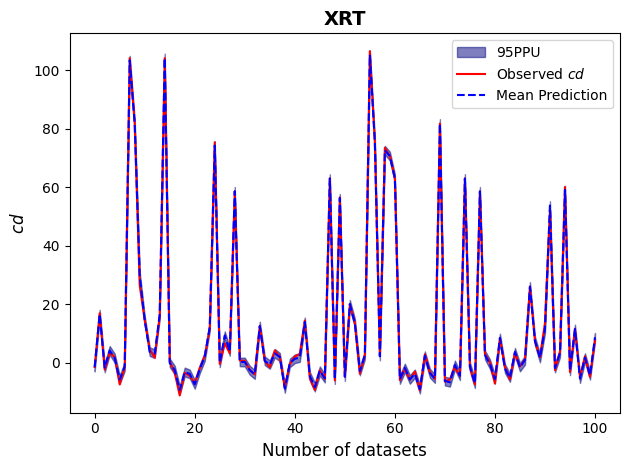


Uncertainty Metrics for gbm Model:
{'P-factor': np.float64(0.9306930693069307), 'R-factor': np.float64(0.10861185252376525), 'd-bar': np.float64(3.1298465883532014), '95% PPU': np.float64(3.1298465883532014)}

Uncertainty Metrics for xgb Model:
{'P-factor': np.float64(0.9405940594059405), 'R-factor': np.float64(0.23577005102767754), 'd-bar': np.float64(6.794139614581865), '95% PPU': np.float64(6.794139614581865)}

Uncertainty Metrics for RF Model:
{'P-factor': np.float64(0.9306930693069307), 'R-factor': np.float64(0.18059055487797093), 'd-bar': np.float64(5.204042827185491), '95% PPU': np.float64(5.204042827185491)}

Uncertainty Metrics for Cat Model:
{'P-factor': np.float64(0.9504950495049505), 'R-factor': np.float64(0.08557791847437428), 'd-bar': np.float64(2.4660821996087554), '95% PPU': np.float64(2.4660821996087554)}

Uncertainty Metrics for XRT Model:
{'P-factor': np.float64(0.9405940594059405), 'R-factor': np.float64(0.10286388445968517), 'd-bar': np.float64(2.9642085127906124)

In [ ]:
 # Models to analyze
models = ['gbm', 'xgb','RF','Cat','XRT']
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ndim_testing.csv')
run_mc(data,models)

# Bootstrap

## Utils

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# Bootstrap simulation function
def bootstrap_simulation(X_train, y_train, X_test, y_test, model_fn, n_iter=1000):
    """
    Perform bootstrap simulation to calculate uncertainty bounds and metrics.

    Parameters:
    - X_train, y_train: Training data.
    - X_test: Test data to predict on.
    - y_test: True target values for X_test (observed values).
    - model_fn: A function that returns a new model instance.
    - n_iter: Number of bootstrap iterations.

    Returns:
    - results: DataFrame with observed, mean prediction, lower and upper 95%PPU bounds.
    """
    predictions = []

    for _ in range(n_iter):
        X_sample, y_sample = resample(X_train, y_train, replace=True)
        model = model_fn()
        model.fit(X_sample, y_sample)
        preds = model.predict(X_test)
        predictions.append(preds)

    predictions = np.array(predictions)
    mean_preds = np.mean(predictions, axis=0)
    lower_bound = np.percentile(predictions, 2.5, axis=0)
    upper_bound = np.percentile(predictions, 97.5, axis=0)

    results = pd.DataFrame({
        'Observed': y_test,
        'Mean_Prediction': mean_preds,
        'Lower_95PPU': lower_bound,
        'Upper_95PPU': upper_bound
    })

    return results


# Metrics calculation (same as MC version)
def calculate_uncertainty_metrics(results):
    observed = results['Observed']
    lower_bound = results['Lower_95PPU']
    upper_bound = results['Upper_95PPU']

    within_bounds = (observed >= lower_bound) & (observed <= upper_bound)
    p_factor = within_bounds.mean()
    r_factor = np.mean(upper_bound - lower_bound) / np.std(observed)
    d_bar = np.mean(upper_bound - lower_bound)

    return {
        'P-factor': p_factor,
        'R-factor': r_factor,
        'd-bar': d_bar,
        '95% PPU': d_bar
    }


# Rank models
def rank_models(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict).T
    metrics_df = metrics_df.sort_values(by=['R-factor', '95% PPU'])
    metrics_df['Rank'] = range(1, len(metrics_df) + 1)
    return metrics_df


# Main Bootstrap Runner
def run_bootstrap(X_train, y_train, X_test, y_test, model_dict, n_iter=1000):
    results_dict = {}
    metrics_dict = {}

    for model_name, model_fn in model_dict.items():
        print(f"Processing model: {model_name}")

        results = bootstrap_simulation(X_train, y_train, X_test, y_test, model_fn, n_iter)
        results_dict[model_name] = results

        metrics = calculate_uncertainty_metrics(results)
        metrics_dict[model_name] = metrics

        # Visualization
        plt.fill_between(range(len(results['Observed'])), results['Lower_95PPU'], results['Upper_95PPU'],
                         color='teal', alpha=0.3, label='95% PPU')
        plt.plot(range(len(results['Observed'])), results['Observed'], 'r-', label='Observed')
        plt.plot(range(len(results['Observed'])), results['Mean_Prediction'], 'b--', label='Mean Prediction')
        plt.title(f'{model_name}', fontsize=14, fontweight='bold')
        plt.xlabel('Sample Index', fontsize=12)
        plt.ylabel('Prediction', fontsize=12)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()

    # Rank models
    ranked_models = rank_models(metrics_dict)

    # Print metrics
    for model, metrics in metrics_dict.items():
        print(f"\nUncertainty Metrics for {model} Model:")
        print(metrics)

    print("\nRanked Models Based on R-factor and 95% PPU:")
    print(ranked_models)


In [ ]:
params_gbm_20 =  {'n_estimators': 310, 'max_depth': 7, 'learning_rate': 0.10664589740085356, 'subsample': 0.6623650248841277, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': None}
params_xgb_20 =   {'n_estimators': 90, 'max_depth': 7, 'learning_rate': 0.2197171170093579, 'subsample': 0.7962931012626785, 'colsample_bytree': 0.9205899728102821, 'gamma': 0.746117386065956, 'reg_alpha': 0.5906239428833475, 'reg_lambda': 0.09608894620402031}

params_catb_20 =  {'iterations': 411, 'depth': 7, 'learning_rate': 0.11693909733978508, 'l2_leaf_reg': 1.0058943176207062, 'bagging_temperature': 0.7947457289044807, 'random_strength': 0.02570983831467845}

params_xrt_20 = {'n_estimators': 147, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}
params_rf_20 =  {'n_estimators': 489, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}


models = {
    'GBM': lambda: GradientBoostingRegressor(**params_gbm_20),
    'XGB': lambda: XGBRegressor(**params_xgb_20),
    'CATB': lambda: CatBoostRegressor(**params_catb_20),
    'XRT': lambda: ExtraTreesRegressor(**params_xrt_20),
    'RF': lambda: RandomForestRegressor(**params_rf_20),
}

## Dimensional

In [ ]:
# Load and rename columns
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dim.csv")
df.columns = ['AR', 'phi', 'L', 'QW', 'Qa', 'Va', 'h', 'R', 'sigma']
X = df.drop(columns=['sigma'])
y = df['sigma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Processing model: GBM


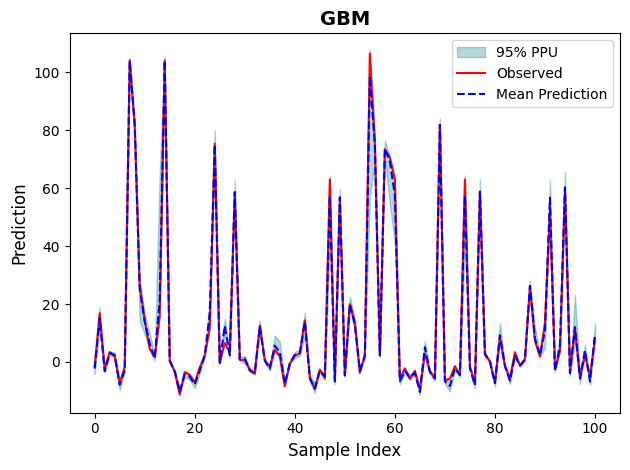

Processing model: XGB


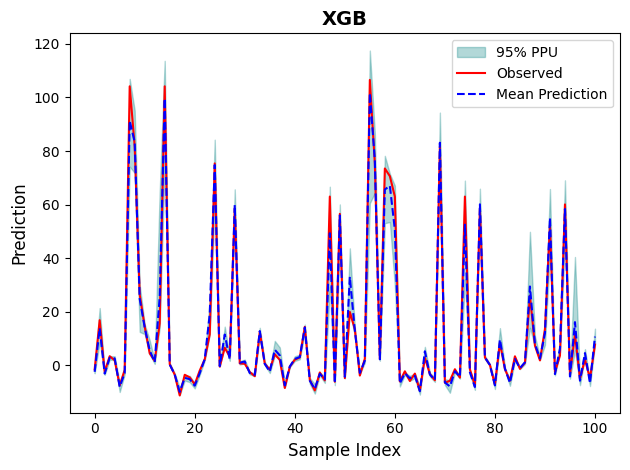

Streaming output truncated to the last 5000 lines.
343:	learn: 0.0462898	total: 288ms	remaining: 56ms
344:	learn: 0.0457453	total: 289ms	remaining: 55.2ms
345:	learn: 0.0454650	total: 289ms	remaining: 54.4ms
346:	learn: 0.0453262	total: 290ms	remaining: 53.5ms
347:	learn: 0.0451800	total: 291ms	remaining: 52.7ms
348:	learn: 0.0449140	total: 292ms	remaining: 51.8ms
349:	learn: 0.0444875	total: 292ms	remaining: 51ms
350:	learn: 0.0438700	total: 293ms	remaining: 50.1ms
351:	learn: 0.0433789	total: 294ms	remaining: 49.3ms
352:	learn: 0.0431667	total: 295ms	remaining: 48.4ms
353:	learn: 0.0428386	total: 296ms	remaining: 47.6ms
354:	learn: 0.0427285	total: 296ms	remaining: 46.7ms
355:	learn: 0.0426581	total: 297ms	remaining: 45.9ms
356:	learn: 0.0424727	total: 298ms	remaining: 45.1ms
357:	learn: 0.0423279	total: 299ms	remaining: 44.2ms
358:	learn: 0.0420509	total: 299ms	remaining: 43.4ms
359:	learn: 0.0417279	total: 300ms	remaining: 42.5ms
360:	learn: 0.0415430	total: 301ms	remaining: 41.7ms

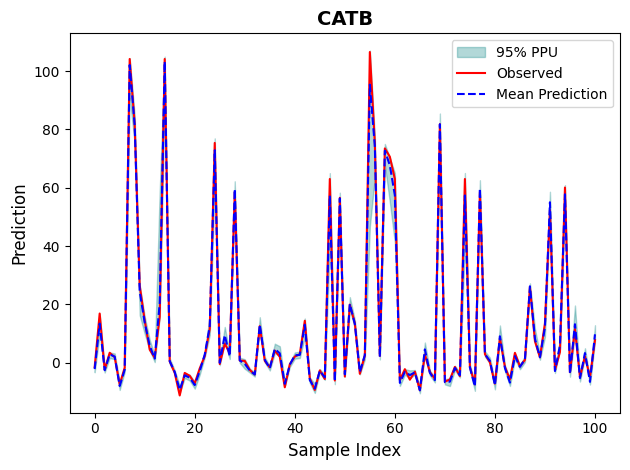

Processing model: XRT


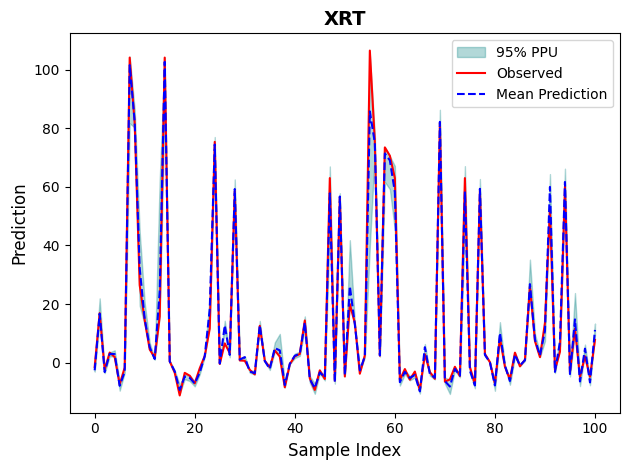

Processing model: RF


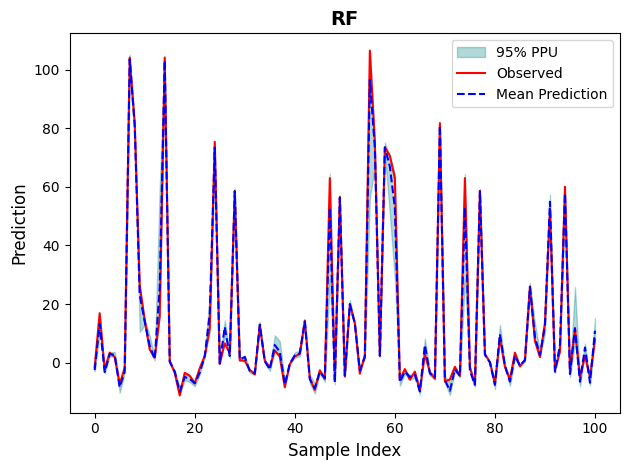


Uncertainty Metrics for GBM Model:
{'P-factor': np.float64(0.801980198019802), 'R-factor': np.float64(0.1787593812769402), 'd-bar': np.float64(5.151274254376051), '95% PPU': np.float64(5.151274254376051)}

Uncertainty Metrics for XGB Model:
{'P-factor': np.float64(0.693069306930693), 'R-factor': np.float32(0.27364814), 'd-bar': np.float32(7.8856654), '95% PPU': np.float32(7.8856654)}

Uncertainty Metrics for CATB Model:
{'P-factor': np.float64(0.8712871287128713), 'R-factor': np.float64(0.18314423741302968), 'd-bar': np.float64(5.277631799147294), '95% PPU': np.float64(5.277631799147294)}

Uncertainty Metrics for XRT Model:
{'P-factor': np.float64(0.5742574257425742), 'R-factor': np.float64(0.1782989196916), 'd-bar': np.float64(5.138005222604133), '95% PPU': np.float64(5.138005222604133)}

Uncertainty Metrics for RF Model:
{'P-factor': np.float64(0.5841584158415841), 'R-factor': np.float64(0.17027808227260494), 'd-bar': np.float64(4.906870313768245), '95% PPU': np.float64(4.9068703137

In [ ]:
run_bootstrap(X_train,y_train,X_test,y_test,models,n_iter=1000)

## Non Dimensional

In [ ]:
params_gbm_20 = {'n_estimators': 252, 'max_depth': 8, 'learning_rate': 0.06285652370947764, 'subsample': 0.8059737929229986, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': None}

params_xgb_20 =  {'n_estimators': 374, 'max_depth': 4, 'learning_rate': 0.19506369878658875, 'subsample': 0.7557741773206197, 'colsample_bytree': 0.9008651041744119, 'gamma': 0.31939781060870454, 'reg_alpha': 1.0334200192977028, 'reg_lambda': 1.5791290618713818}

params_catb_20 =  {'iterations': 441, 'depth': 6, 'learning_rate': 0.15310299327795915, 'l2_leaf_reg': 3.3330519675173056, 'bagging_temperature': 0.11689119833947537, 'random_strength': 0.000706267657318276}

params_xrt_20 = {'n_estimators': 495, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}

params_rf_20 = {'n_estimators': 160, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}



models = {
    'GBM': lambda: GradientBoostingRegressor(**params_gbm_20),
    'XGB': lambda: XGBRegressor(**params_xgb_20),
    'CATB': lambda: CatBoostRegressor(**params_catb_20),
    'XRT': lambda: ExtraTreesRegressor(**params_xrt_20),
    'RF': lambda: RandomForestRegressor(**params_rf_20),
}

Processing model: GBM


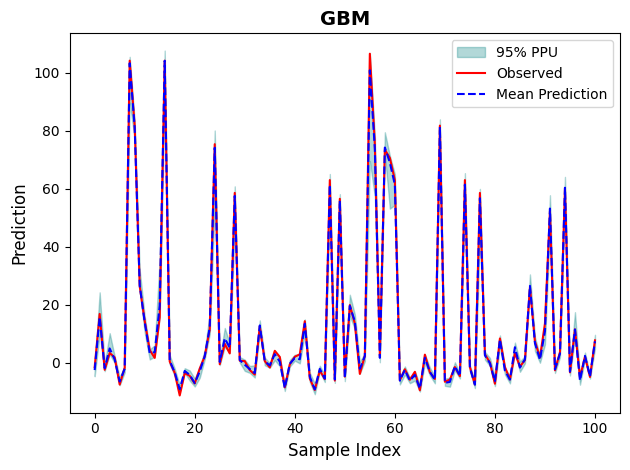

Processing model: XGB


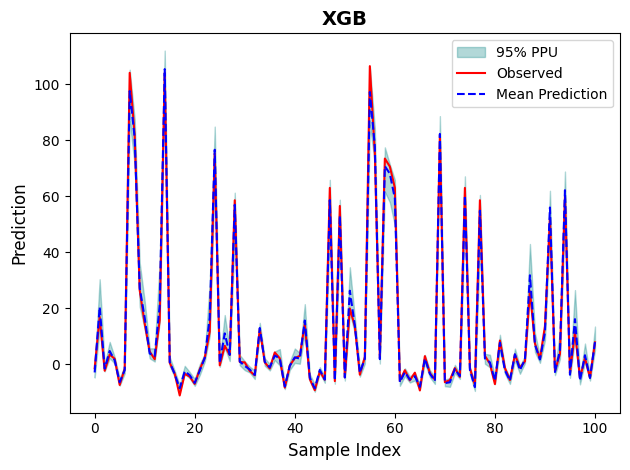

Streaming output truncated to the last 5000 lines.
292:	learn: 0.1188889	total: 133ms	remaining: 67.1ms
293:	learn: 0.1186454	total: 133ms	remaining: 66.6ms
294:	learn: 0.1184976	total: 134ms	remaining: 66.2ms
295:	learn: 0.1176001	total: 134ms	remaining: 65.7ms
296:	learn: 0.1168038	total: 134ms	remaining: 65.2ms
297:	learn: 0.1163235	total: 135ms	remaining: 64.7ms
298:	learn: 0.1154224	total: 135ms	remaining: 64.2ms
299:	learn: 0.1153528	total: 136ms	remaining: 63.8ms
300:	learn: 0.1150726	total: 136ms	remaining: 63.3ms
301:	learn: 0.1147478	total: 136ms	remaining: 62.8ms
302:	learn: 0.1141067	total: 137ms	remaining: 62.3ms
303:	learn: 0.1138152	total: 137ms	remaining: 61.9ms
304:	learn: 0.1131218	total: 138ms	remaining: 61.4ms
305:	learn: 0.1125946	total: 138ms	remaining: 60.9ms
306:	learn: 0.1123978	total: 138ms	remaining: 60.4ms
307:	learn: 0.1119852	total: 139ms	remaining: 60ms
308:	learn: 0.1115318	total: 139ms	remaining: 59.5ms
309:	learn: 0.1108346	total: 140ms	remaining: 59ms

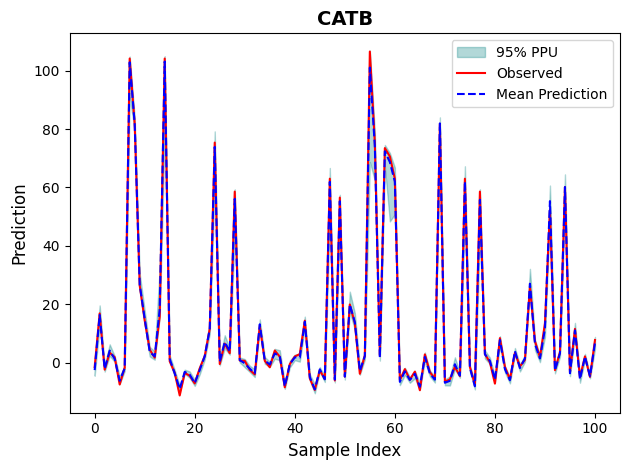

Processing model: XRT


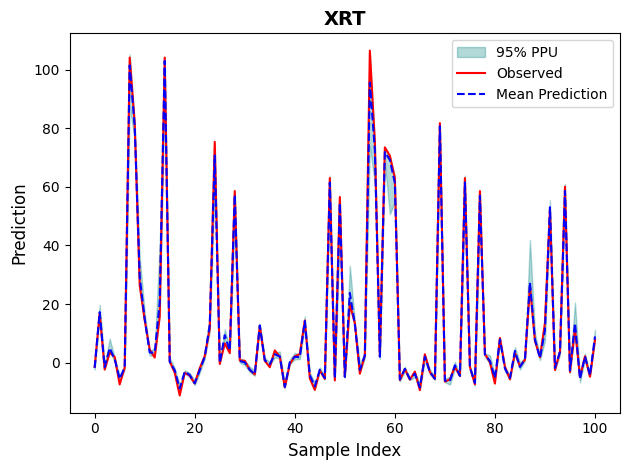

Processing model: RF


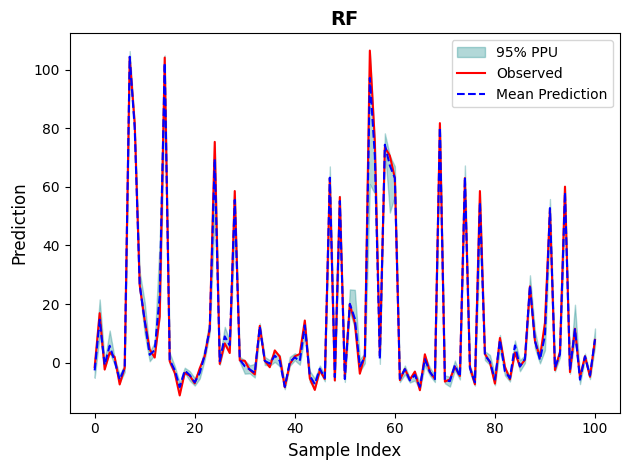


Uncertainty Metrics for GBM Model:
{'P-factor': np.float64(0.9108910891089109), 'R-factor': np.float64(0.18668117703442602), 'd-bar': np.float64(5.379555098953053), '95% PPU': np.float64(5.379555098953053)}

Uncertainty Metrics for XGB Model:
{'P-factor': np.float64(0.9405940594059405), 'R-factor': np.float32(0.22995472), 'd-bar': np.float32(6.62656), '95% PPU': np.float32(6.62656)}

Uncertainty Metrics for CATB Model:
{'P-factor': np.float64(0.9504950495049505), 'R-factor': np.float64(0.17524142324872777), 'd-bar': np.float64(5.049897943442019), '95% PPU': np.float64(5.049897943442019)}

Uncertainty Metrics for XRT Model:
{'P-factor': np.float64(0.6831683168316832), 'R-factor': np.float64(0.1466643200327941), 'd-bar': np.float64(4.2263971290549645), '95% PPU': np.float64(4.2263971290549645)}

Uncertainty Metrics for RF Model:
{'P-factor': np.float64(0.7128712871287128), 'R-factor': np.float64(0.19052293238953652), 'd-bar': np.float64(5.490262214356036), '95% PPU': np.float64(5.490262

In [ ]:
# Load and rename columns
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/non_dim.csv")
df.columns = ['AR', 'phi', 'R/L', 'Fr', 'Qa/Qw', 'sigma']
X = df.drop(columns=['sigma'])
y = df['sigma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

run_bootstrap(X_train,y_train,X_test,y_test,models,n_iter=1000)